In [1]:
# Thompson Sampling

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
rawdata = pd.read_csv('Ads_CTR_Optimisation.csv')
print(rawdata)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0     0     1      0
14       0

In [3]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = rawdata.values[n, ad]
    if (reward == 1):
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

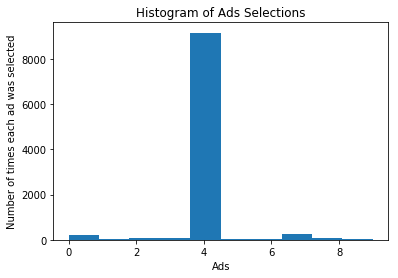

In [4]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()